In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [3]:
df = pd.read_csv("/content/anti_dataset.csv")
df.head()

,ANTI_A,ANTI_B,V1
0,2.77,98.1,6.0
1,9.79,16.8,6.7
2,9.29,13.6,7.5
3,3.41,1.6,7.6
4,9.83,55.3,8.4


In [4]:
min_val=df['V1'].min()
print(min_val)

max_val=df['V1'].max()
print(max_val)

6.0
90.7


In [6]:
bins = np.linspace(min_val, max_val, 6)
bins

array([ 6.  , 22.94, 39.88, 56.82, 73.76, 90.7 ])

In [9]:
df["V1_equal_width"] = pd.cut(df["V1"], bins=bins, labels=["bin1", "bin2", "bin3", "bin4", "bin5"], include_lowest = True)
df["V1_equal_width"].value_counts()

bin1    23
bin4     8
bin5     8
bin3     1
bin2     0
Name: V1_equal_width, dtype: int64

In [10]:
df["V1_equal_depth"] = pd.qcut(df["V1"], 5, labels=["bin1", "bin2", "bin3", "bin4", "bin5"])
df["V1_equal_depth"].value_counts()

bin1    8
bin2    8
bin3    8
bin4    8
bin5    8
Name: V1_equal_depth, dtype: int64

In [11]:
group1 = df[df["V1_equal_width"] == "bin1"]
group2 = df[df["V1_equal_width"] != "bin1"]

In [12]:
group1.describe()

,ANTI_A,ANTI_B,V1
count,23.000000,23.000000,23.000000
mean,5.307826,48.495652,11.952174
std,3.363449,32.804302,3.830840
min,0.170000,1.600000,6.000000
25%,2.750000,16.600000,9.350000
50%,5.070000,48.300000,11.500000
75%,8.300000,81.950000,14.500000
max,9.940000,98.100000,21.400000


In [13]:
group2.describe()

,ANTI_A,ANTI_B,V1
count,17.000000,17.000000,17.000000
mean,4.857059,51.041176,71.982353
std,2.937230,30.416526,9.593112
min,0.630000,9.200000,55.500000
25%,1.740000,26.200000,64.900000
50%,6.120000,53.300000,73.400000
75%,7.340000,78.900000,77.900000
max,8.620000,98.800000,90.700000


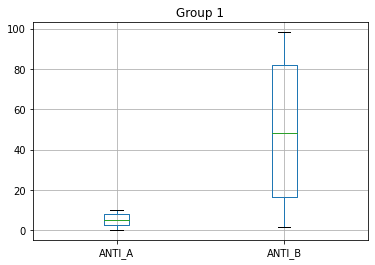

In [14]:
group1.boxplot(column=["ANTI_A", "ANTI_B"])
plt.title("Group 1")
plt.show()

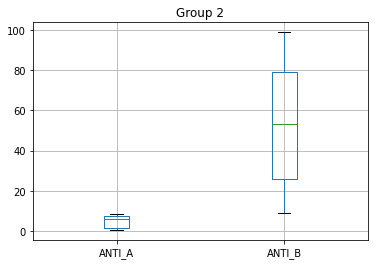

In [15]:
group2.boxplot(column=["ANTI_A", "ANTI_B"])
plt.title("Group 2")
plt.show()

In [17]:
group1_norm = pd.DataFrame(minmax_scale(group1[["ANTI_A", "ANTI_B"]]), columns=["ANTI_A_norm", "ANTI_B_norm"])
group2_norm = pd.DataFrame(minmax_scale(group2[["ANTI_A", "ANTI_B"]]), columns=["ANTI_A_norm", "ANTI_B_norm"])

In [18]:
group1_norm.head()

,ANTI_A_norm,ANTI_B_norm
0,0.266121,1.000000
1,0.984647,0.157513
2,0.933470,0.124352
3,0.331627,0.000000
4,0.988741,0.556477


In [19]:
group2_norm.head()

,ANTI_A_norm,ANTI_B_norm
0,0.896120,0.582589
1,0.451815,0.492188
2,0.000000,0.023438
3,0.100125,0.189732
4,0.101377,0.264509


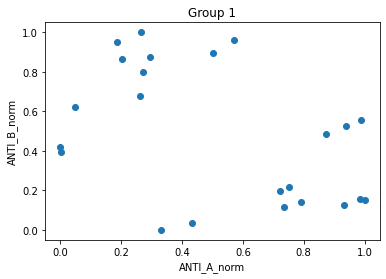

In [20]:
plt.scatter(group1_norm["ANTI_A_norm"], group1_norm["ANTI_B_norm"])
plt.title("Group 1")
plt.xlabel("ANTI_A_norm")
plt.ylabel("ANTI_B_norm")
plt.show()

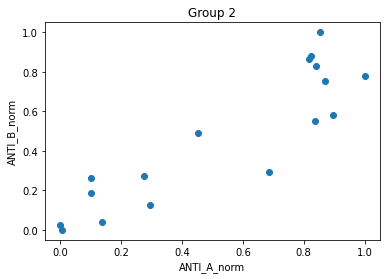

In [21]:
plt.scatter(group2_norm["ANTI_A_norm"], group2_norm["ANTI_B_norm"])
plt.title("Group 2")
plt.xlabel("ANTI_A_norm")
plt.ylabel("ANTI_B_norm")
plt.show()

In [25]:
group1_corr = group1_norm.corr(method="pearson")
group2_corr = group2_norm.corr(method="pearson")

In [26]:
group1_corr.head()

,ANTI_A_norm,ANTI_B_norm
ANTI_A_norm,1.000000,-0.449627
ANTI_B_norm,-0.449627,1.000000


In [27]:
group1_corr.head()

,ANTI_A_norm,ANTI_B_norm
ANTI_A_norm,1.000000,-0.449627
ANTI_B_norm,-0.449627,1.000000
